## Autoencoders

Autoencoders are used in unsupervised learning (data without labels)

*   **Encoder** learns mapping from the data, $x$, to a low-dimensional latent space, $z$
*   **Decoder** learns mapping back from latent space, $z$, to a reconstructed observation $\hat{x}$

*   Two pratical applications of autoencoders are dimensionality reduction of data and data denoising






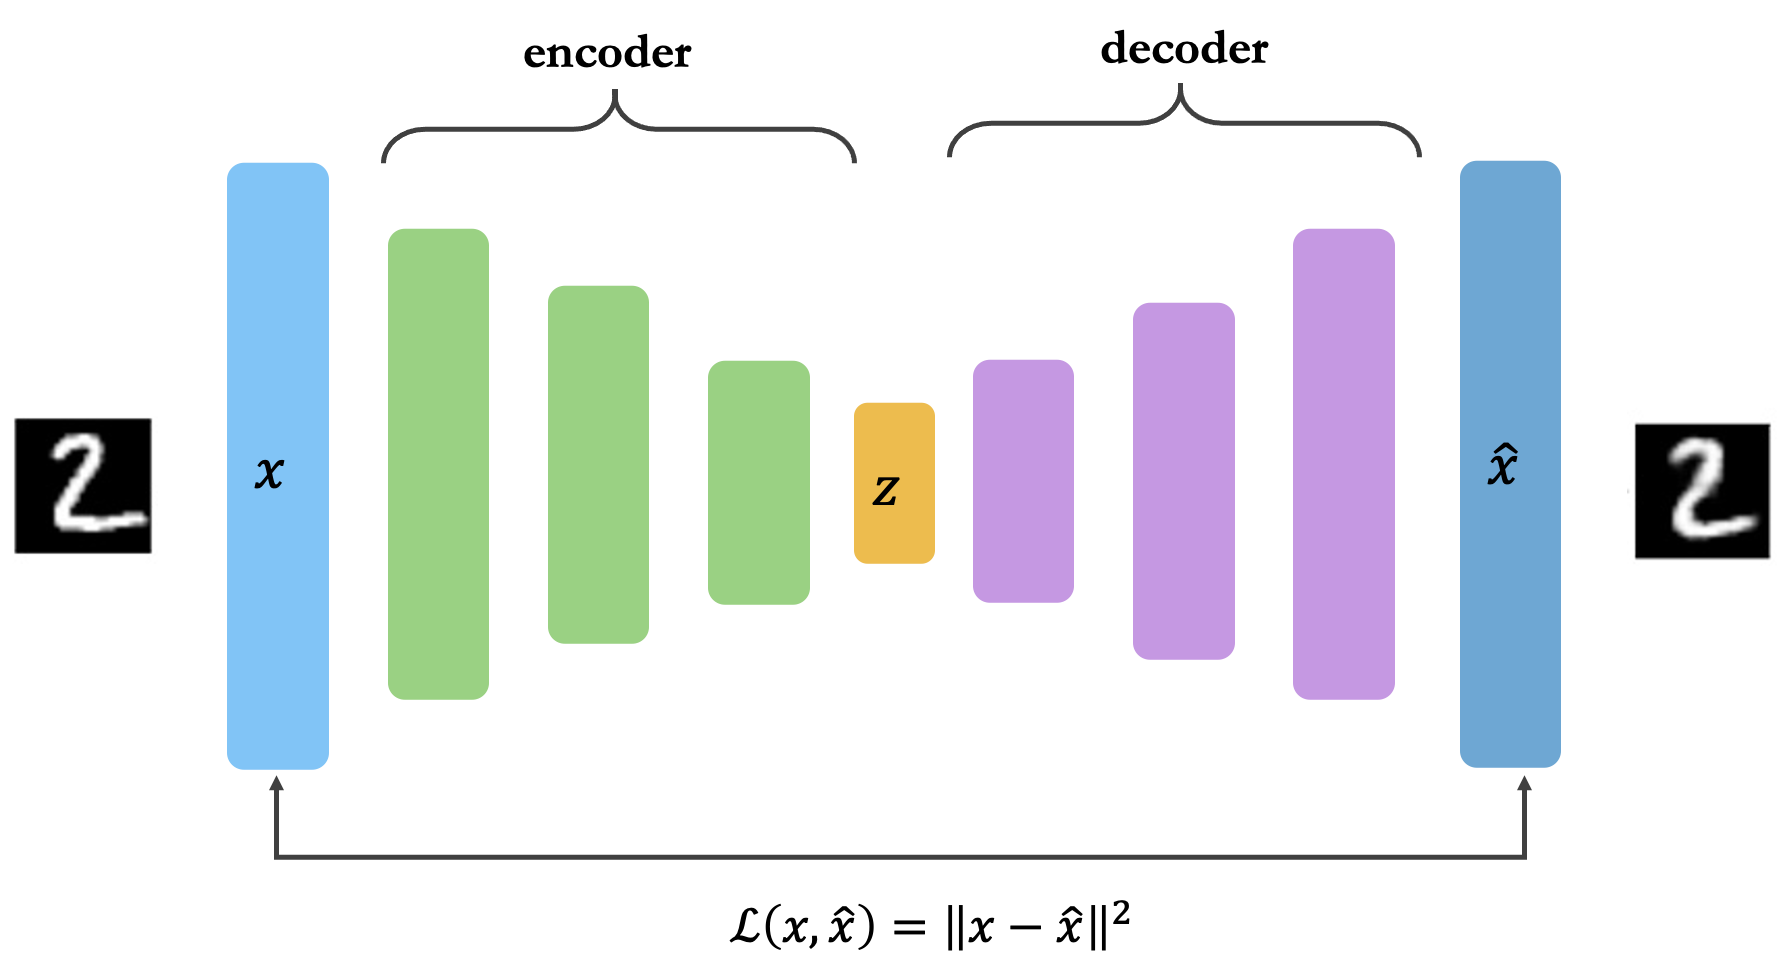

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
# preparing the dataset

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype("float32") / 225.0
X_test = X_test.astype("float32") / 225.0


11490434/11490434 [==============================] - 2s 0us/step


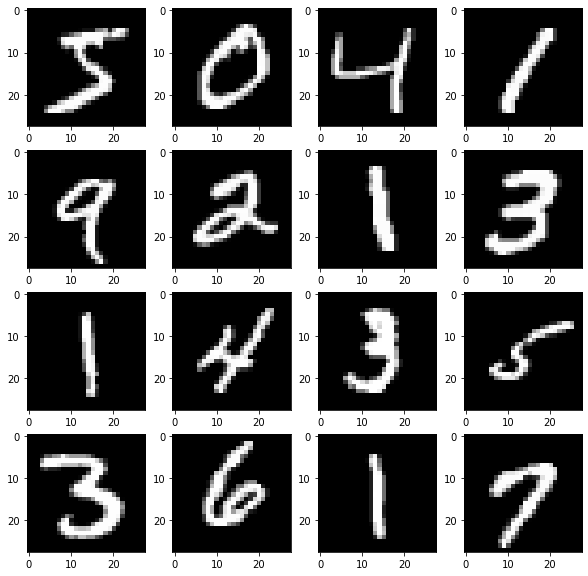

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) 

for i in range(16):
    plt.subplot(4,4,i+1)    
    plt.imshow(X_train[i], cmap='gray')

plt.show()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train = tf.expand_dims(X_train, axis=-1)
x_test = tf.expand_dims(X_test, axis=-1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

# Encoder part

input = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(input)
encoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(x)

# Decoder part

y = layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same')(encoded)
y = layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same')(y)
output = layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')(y)

AE_model = Model(inputs = input, outputs = output)

AE_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145   

## Conv2Dtranspose layer
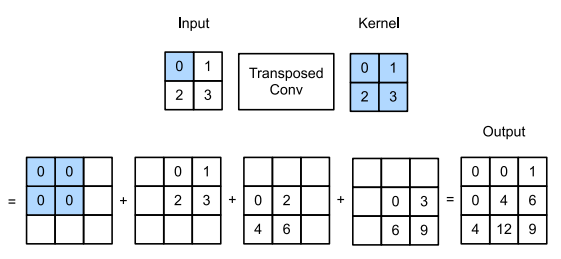

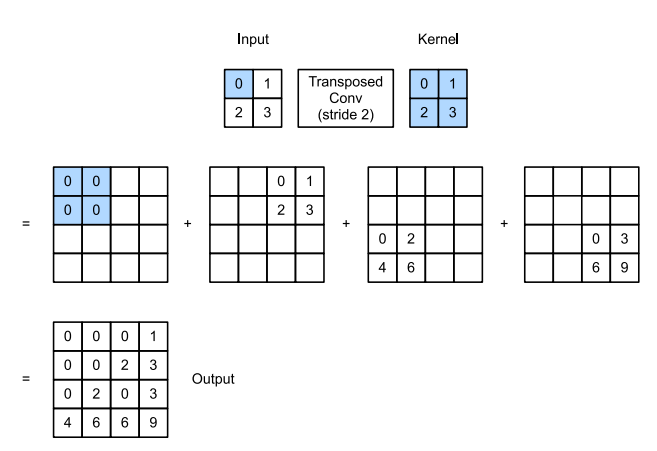

In [7]:
AE_model.compile(optimizer='adam', loss=keras.losses.MeanSquaredError())

In [8]:
history = AE_model.fit(x_train, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 12s 4ms/step - loss: 0.0247 - val_loss: 0.0047
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 8/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 9/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 10/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0024 - val_loss: 0.002

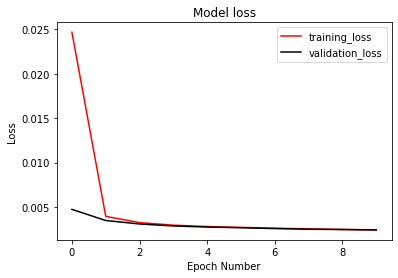

In [9]:
plt.title('Model loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'],'r',label = 'training_loss')
plt.plot(history.history['val_loss'],'k', label = 'validation_loss')
plt.legend()

In [10]:
AE_model.evaluate(x_test, x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0024


0.0024415291845798492

In [11]:
y_pred = AE_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
def visualize(original, reconstructed):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original, cmap='gray')

  plt.subplot(1,2,2)
  plt.title('reconstructed image')
  plt.imshow(reconstructed, cmap='gray')

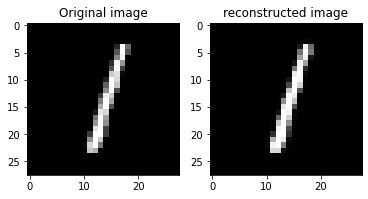

In [16]:
visualize(tf.reshape(x_test[2, :, :, :], (28, 28)), tf.reshape(y_pred[2, :, :, :], (28, 28)))

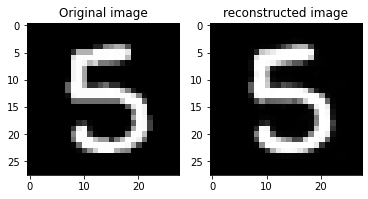

In [18]:
visualize(tf.reshape(x_test[165, :, :, :], (28, 28)), tf.reshape(y_pred[165, :, :, :], (28, 28)))